# PMF

This notebook implements Probabilistic Matrix Factorization (PMF) for collaborative filtering, based on the paper:

> *Mnih, A., & Salakhutdinov, R. (2007). Probabilistic matrix factorization. In Advances in neural information processing systems (pp. 1257-1264).*

We leverage the following repository for the Python implementation: [Python Implementation of Probabilistic Matrix Factorization Algorithm](https://github.com/libao3128/Probabilistic-Matrix-Factorization.git).

---

**Workflow Overview:**
- **Data Loading:** MovieLens ratings data is loaded and split into training and test sets.
- **Model Training:** PMF is trained on the training set with configurable hyperparameters.
- **Evaluation:** Model performance is assessed using RMSE, MAE, and ranking metrics (Precision & Recall at K).
- **Model Saving:** Trained model parameters are saved for future use.

This notebook provides a step-by-step demonstration of PMF for movie recommendation tasks.

In [9]:
from PMF.ProbabilisticMatrixFactorization import PMF
import pandas as pd 

import sys
import os
sys.path.append(os.path.abspath('..'))
from eval_framework.reporter import PMFRecommenderReporter
from eval_framework.data_loader import load_data, split_data

## Load Data

In [2]:
ratings, movies = load_data()
ratings.drop(columns=['timestamp'], inplace=True)
train_ratings, test_ratings = split_data(ratings)

Loading data...
Loaded 100836 ratings and 9742 movies
\nSplitting data...
Training set size: 80668, Test set size: 20168


## Train Model

In [3]:
params = {
    "num_feat": 50, 
    "epsilon": 1, 
    "_lambda": 0.1, 
    "momentum": 0.8, 
    "maxepoch": 100, 
    "num_batches": 100,
    "batch_size": 1000
}
pmf = PMF()
pmf.set_params(parameters=params)

In [4]:
pmf.fit(train_ratings.values,  test_ratings.values)

Epoch 1 | Training RMSE: 1.0614274787058124 , Test RMSE 1.0514178826405665
Epoch 2 | Training RMSE: 1.0530685698090416 , Test RMSE 1.0505653141068227
Epoch 3 | Training RMSE: 1.0428670355413472 , Test RMSE 1.0482702844593672
Epoch 4 | Training RMSE: 1.0266880265316007 , Test RMSE 1.0421713992447779
Epoch 5 | Training RMSE: 0.9992577226861966 , Test RMSE 1.0285660441989977
Epoch 6 | Training RMSE: 0.9602379958406865 , Test RMSE 1.007685368356289
Epoch 7 | Training RMSE: 0.9166017489297507 , Test RMSE 0.9851050869894226
Epoch 8 | Training RMSE: 0.8752017217664929 , Test RMSE 0.9659814920963519
Epoch 9 | Training RMSE: 0.839472770750157 , Test RMSE 0.951718893054022
Epoch 10 | Training RMSE: 0.8081626277804375 , Test RMSE 0.9409924228412553
Epoch 11 | Training RMSE: 0.7802780369530722 , Test RMSE 0.9329817889411826
Epoch 12 | Training RMSE: 0.7545286706518968 , Test RMSE 0.9264897158465342
Epoch 13 | Training RMSE: 0.7311267938053766 , Test RMSE 0.9220414147308577
Epoch 14 | Training RMSE

In [12]:
pmf.save_model('model/pmf_model.npz')

## Evaluation

In [5]:
reporter = PMFRecommenderReporter()
reporter.evaluate_model(pmf, test_ratings)

reporter.print_stats()


Evaluating predictions...


Evaluating ratings: 100%|██████████| 20168/20168 [00:32<00:00, 615.81it/s]



Universal Evaluation Metrics:
MSE: 0.8260
RMSE: 0.9089
MAE: 0.6950
Inference Time per Prediction: -0.0016 seconds



Generating universal plots...


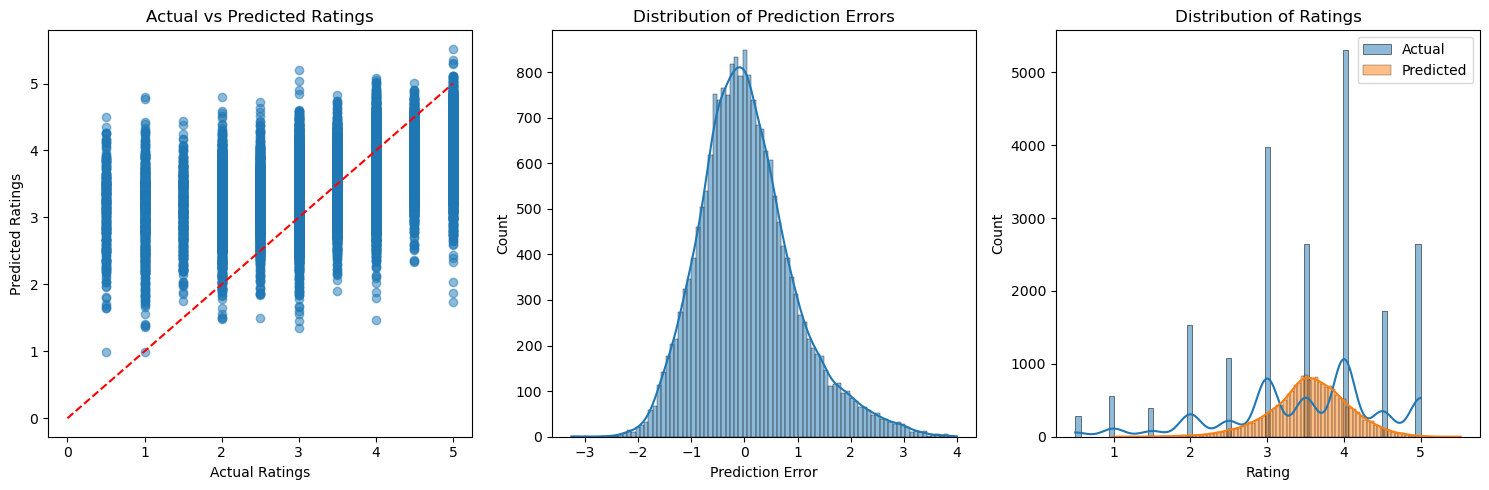

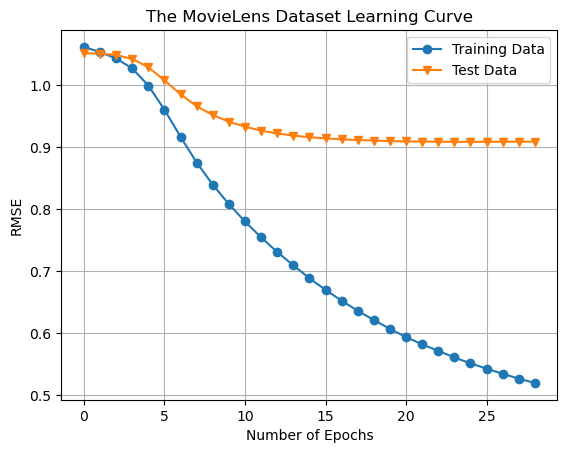

In [6]:
reporter.plot_all()